# Fingerprints Quality Classification
## DNN Course JCE - Final Project 
### By Kobi Amsellem & Zohar Kedem

Expirements:
* Try to classify 5 classes that represat the quality of the finger print (0 poor, 4 best)

In [16]:
import numpy as np
import tensorflow as tf
import keras
import pathlib
import PIL
import matplotlib.pyplot as plt

In [17]:
data_dir = pathlib.Path('./Dataset')
count = len(list(data_dir.glob('*/*.jpg')))

print('Total: ', count, ' examples')

Total:  976  examples


In [18]:
batch_size = 32
img_height = 710
img_width = 1080
seed=123
validation_split = 0.3


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='int',
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='int',
  )

Found 976 files belonging to 5 classes.
Using 684 files for training.
Found 976 files belonging to 5 classes.
Using 292 files for validation.


In [19]:

print(train_ds)
x=train_ds
class_names = train_ds.class_names
print(class_names)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

<BatchDataset shapes: ((None, 710, 1080, 3), (None,)), types: (tf.float32, tf.int32)>
['0', '1', '2', '3', '4']
(32, 710, 1080, 3)
(32,)


3
2
3
4
4
2
1
2
1


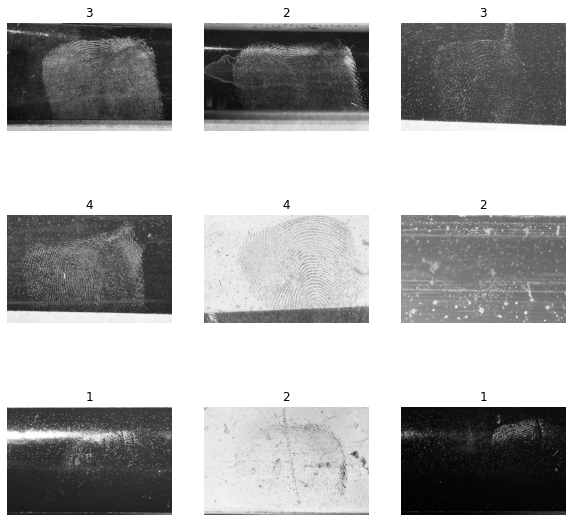

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(labels[i].numpy())
    plt.title(labels[i].numpy())
    plt.axis("off")

In [21]:
input_t =tf.keras.Input(shape=(710, 1080,3))
    
res_net=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(710, 1080,3), pooling=None, classes=5
)
res_net.summary()   

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 710, 1080,   0           []                               
                                3)]                                                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 716, 1086, 3  0           ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_conv (Conv2D)            (None, 355, 540, 64  9472        ['conv1_pad[0][0]']              
                                )                                                          

In [22]:
model = tf.keras.models.Sequential()
model.add(res_net)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="mse")
model.fit(train_ds)